In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust import distlib

## Examples of creating a power law distribution

The <code>distlib.MRN_dist()</code> functions return a <code>distlib.DustSpectrum</code> object.  

The object contains an array of grain radii (a), the number density (nd), and total dust mass (md).

In [3]:
mrn_test1 = distlib.MRN_dist(0.005, 0.3, 3.5)
mrn_test2 = distlib.MRN_dist(0.005, 0.25, 3.5)
mrn_test3 = distlib.MRN_dist(0.005, 0.3, 4.0)
mrn_test4 = distlib.MRN_dist(0.005, 0.3, 3.5, na=10, log=True)

Here's a quick way to see all the keys in the DustSpectrum object.

In [4]:
print(type(mrn_test1))
print(mrn_test1.__dict__.keys())

<class 'astrodust.distlib.sizedist.DustSpectrum'>
['a', 'md', 'nd', 'rho']


(0.005, 0.3)

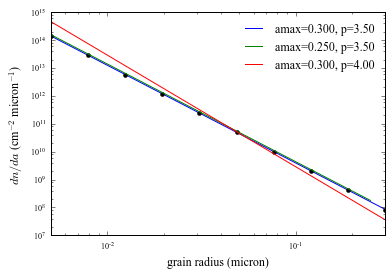

In [5]:
plt.plot(mrn_test1.a, mrn_test1.nd, label='amax=%.3f, p=%.2f' % (mrn_test1.a[-1], 3.5))
plt.plot(mrn_test4.a, mrn_test4.nd, 'ko', label='')
plt.plot(mrn_test2.a, mrn_test2.nd, label='amax=%.3f, p=%.2f' % (mrn_test2.a[-1], 3.5))
plt.plot(mrn_test3.a, mrn_test3.nd, label='amax=%.3f, p=%.2f' % (mrn_test3.a[-1], 4.0))
plt.legend(loc='upper right', frameon=False)
plt.loglog()
plt.xlabel('grain radius (micron)')
plt.ylabel(r'$dn/da$ (cm$^{-2}$ micron$^{-1}$)')
plt.xlim(0.005,0.3)

## Play with WD01 dust distributions

Dust grain size distributions from Weingartner & Draine (2001)

http://adsabs.harvard.edu/abs/2001ApJ...548..296W

Use the function <code>make_WD01_DustSpectrum</code> to return a <code>DustSpectrum</code> object.

In [6]:
wd_MW_gra = distlib.make_WD01_DustSpectrum(type='Graphite', verbose=False)
wd_MW_sil = distlib.make_WD01_DustSpectrum(type='Silicate', verbose=False)

wd_MW_gra_bc6 = distlib.make_WD01_DustSpectrum(type='Graphite', bc=6.0, verbose=False)
wd_MW_sil_bc6 = distlib.make_WD01_DustSpectrum(type='Silicate', bc=6.0, verbose=False)

(1e-20, 1e-15)

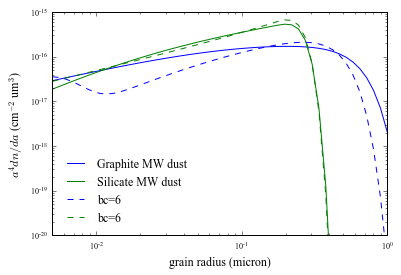

In [7]:
plt.plot(wd_MW_gra.a, wd_MW_gra.nd*wd_MW_gra.a**4, label='Graphite MW dust')
plt.plot(wd_MW_sil.a, wd_MW_sil.nd*wd_MW_sil.a**4, label='Silicate MW dust')

plt.plot(wd_MW_gra_bc6.a, wd_MW_gra_bc6.nd*wd_MW_gra_bc6.a**4, 'b--', label='bc=6')
plt.plot(wd_MW_sil_bc6.a, wd_MW_sil_bc6.nd*wd_MW_sil_bc6.a**4, 'g--', label='bc=6')

plt.xlabel('grain radius (micron)')
plt.ylabel(r'$a^4 dn/da$ (cm$^{-2}$ um$^{3}$)')

plt.legend(loc='lower left', frameon=False)
plt.loglog()
plt.xlim(0.005, 1)
plt.ylim(1.e-20,1.e-15)

The <code>DustSpectrum</code> objects also contain an <code>integrate_dust_mass()</code> function for calculating the total mass column of dust (g cm^-2).

In [8]:
print("Graphite dust mass = %.3e" %(wd_MW_gra.integrate_dust_mass()))
print("Silicate dust mass = %.3e" %(wd_MW_sil.integrate_dust_mass()))

Graphite dust mass = 4.931e-27
Silicate dust mass = 1.379e-26
